In [1]:
import os

# === DIRECTORIES ===
base_dir = './dataset'
train_dir = os.path.join(base_dir, 'train', 'ind')
val_dir = os.path.join(base_dir, 'val', 'ind')
test_dir = os.path.join(base_dir, 'test', 'ind')

roles = ['adc', 'top', 'jungle', 'support', 'mid']
results = {}

# === COUNT IMAGES FOR EACH ROLE IN EACH SET ===
for dataset_type, dataset_dir in [('train', train_dir), ('val', val_dir), ('test', test_dir)]:
    for role in roles:
        role_path_true = os.path.join(dataset_dir, role, 'true')
        role_path_false = os.path.join(dataset_dir, role, 'false')
        
        count_true = len(os.listdir(role_path_true)) if os.path.exists(role_path_true) else 0
        count_false = len(os.listdir(role_path_false)) if os.path.exists(role_path_false) else 0
        total = count_true + count_false

        results[f"{dataset_type}_{role}"] = total

# === PRINT RESULTS ===
for key, value in results.items():
    print(f"Total {key.replace('_', ' ')} images:", value)


Total train adc images: 574
Total train top images: 574
Total train jungle images: 574
Total train support images: 574
Total train mid images: 574
Total val adc images: 122
Total val top images: 122
Total val jungle images: 122
Total val support images: 122
Total val mid images: 122
Total test adc images: 124
Total test top images: 124
Total test jungle images: 124
Total test support images: 124
Total test mid images: 124


In [2]:
from keras.utils import image_dataset_from_directory

IMG_SIZE = 280

train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=64)

validation_dataset = image_dataset_from_directory(
    val_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32)

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32)

2025-05-20 11:46:20.975920: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-20 11:46:21.218828: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747737981.355277   24955 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747737981.393579   24955 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747737981.732204   24955 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Found 2870 files belonging to 5 classes.


I0000 00:00:1747737989.081294   24955 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3539 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Found 610 files belonging to 5 classes.
Found 620 files belonging to 5 classes.


In [3]:
for data_batch, labels_batch in train_dataset:
 print('data batch shape:', data_batch.shape)
 print('labels batch shape:', labels_batch.shape)
 break

data batch shape: (64, 280, 280, 3)
labels batch shape: (64,)


2025-05-20 11:45:06.002254: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 67108864 bytes after encountering the first element of size 67108864 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


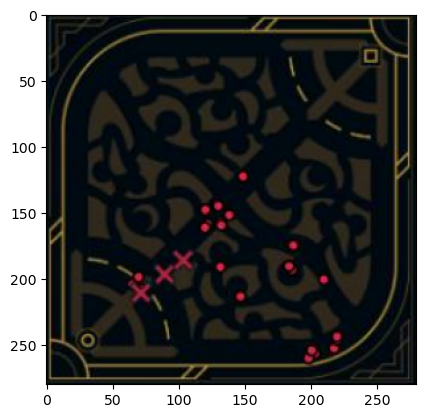

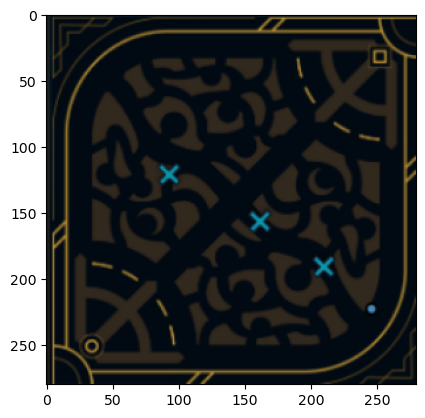

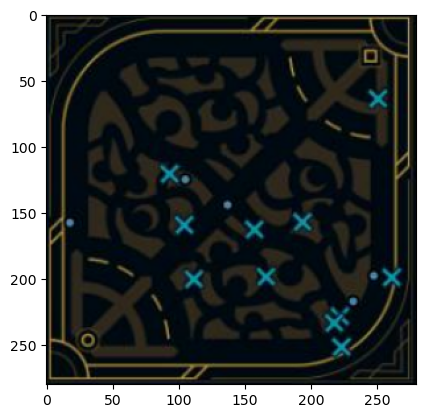

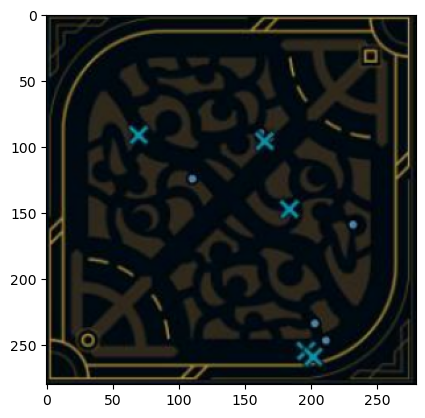

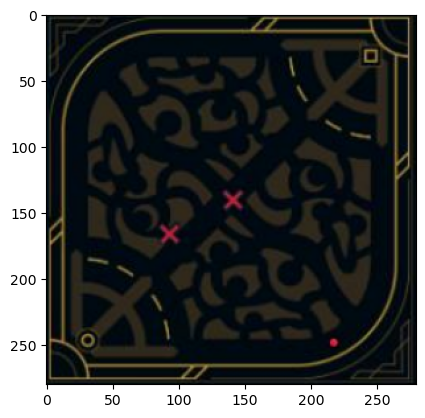

2025-05-20 11:45:10.747973: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [4]:
import matplotlib.pyplot as plt

for data_batch, _ in train_dataset.take(1):
 for i in range(5):
    plt.imshow(data_batch[i].numpy().astype("uint8"))
    plt.show()

In [5]:
from tensorflow import keras
from keras import layers
from keras import models

inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(5, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [6]:
model.summary() #verify network structure

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 280, 280, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 280, 280, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 278, 278, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 139, 139, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 137, 137, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 68, 68, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 66, 66, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 33, 33, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 31, 31, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    14,746,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,989,509 (57.18 MB)

 Trainable params: 14,989,509 (57.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
    metrics=['accuracy'])

history = model.fit(
 train_dataset,
 epochs=20,
 validation_data=validation_dataset)

Epoch 1/20


I0000 00:00:1747737921.949389   24424 service.cc:152] XLA service 0x7f13e400ae70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747737921.952768   24424 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-05-20 11:45:22.320993: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1747737923.222774   24424 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-05-20 11:45:26.818524: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_222', 48 bytes spill stores, 48 bytes spill loads

2025-05-20 11:45:26.974882: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion

In [ ]:
test_loss, test_acc = model.evaluate(validation_dataset)
test_acc

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6176 - loss: 4.3875


0.5950819849967957

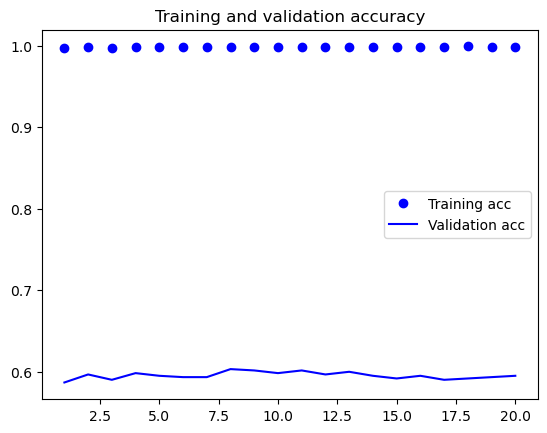

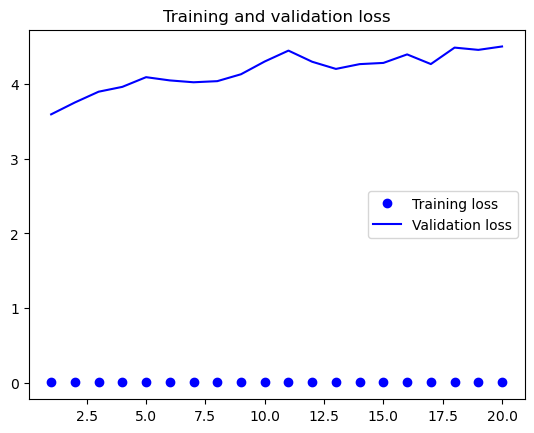

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
